In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

# Try reading the CSV file with different encodings
try_encodings = ['utf-8', 'latin1', 'utf-16']

for encoding in try_encodings:
    try:
        df = pd.read_csv('spam.csv', encoding=encoding)
        break  # If successful, exit the loop
    except UnicodeDecodeError:
        print(f"Failed to read with {encoding} encoding. Trying next...")

# Now you can work with your DataFrame
pd.set_option('display.max_columns', 200)  # Set display option if needed
df.head()

# Display null value counts
df.isnull().sum()

Failed to read with utf-8 encoding. Trying next...


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [3]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.shape

(5572, 5)

# **Data Cleaning**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.sample(2)

,Target,Text
19,spam,England v Macedonia - dont miss the goals/team...
187,spam,Please call our customer service representativ...


In [11]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [12]:
df['Target']=enc.fit_transform(df['Target'])
enc.classes_

array(['ham', 'spam'], dtype=object)

In [13]:
df.sample(3)

,Target,Text
3629,1,Get the official ENGLAND poly ringtone or colo...
2200,0,Haha... can... But i'm having dinner with my c...
3926,0,Lol ... I really need to remember to eat when ...


In [14]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
# remove duplicate values
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

# **EDA**

In [19]:
df.Target.value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

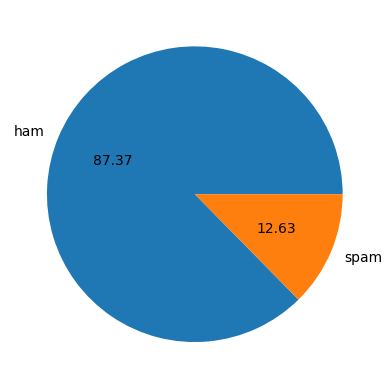

In [20]:
plt.pie(df['Target'].value_counts(),
        labels=['ham','spam'],autopct='%0.2f')
plt.show()
# Data is imbalanced

In [21]:
import nltk

In [22]:
# nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_char'] = df['Text'].apply(len)

In [24]:
df.sample(2)

,Target,Text,num_char
5014,0,I think the other two still need to get cash b...,73
3637,1,Customer service announcement. We recently tri...,152


In [25]:
# number of words
df['num_word'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,Target,Text,num_char,num_word
263,1,Hey I am really horny want to chat or see me n...,121,25
3957,0,So i could kiss and feel you next to me...,42,11
2424,0,Oh k k:)but he is not a big hitter.anyway good,46,13
2627,0,I know I'm lacking on most of this particular ...,115,24
1971,0,Enjoy ur life. . Good night,27,7


In [26]:
# number of sentences
df['num_sentences'] = df['Text'].apply(lambda x:(len(nltk.sent_tokenize(x))))

In [27]:
df.head()

,Target,Text,num_char,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df.describe()

,Target,num_char,num_word,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [29]:
# ham
df[df['Target']==0][['num_char','num_word','num_sentences']].describe()

,num_char,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# spam
df[df['Target']==1][['num_char','num_word','num_sentences']].describe()

,num_char,num_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


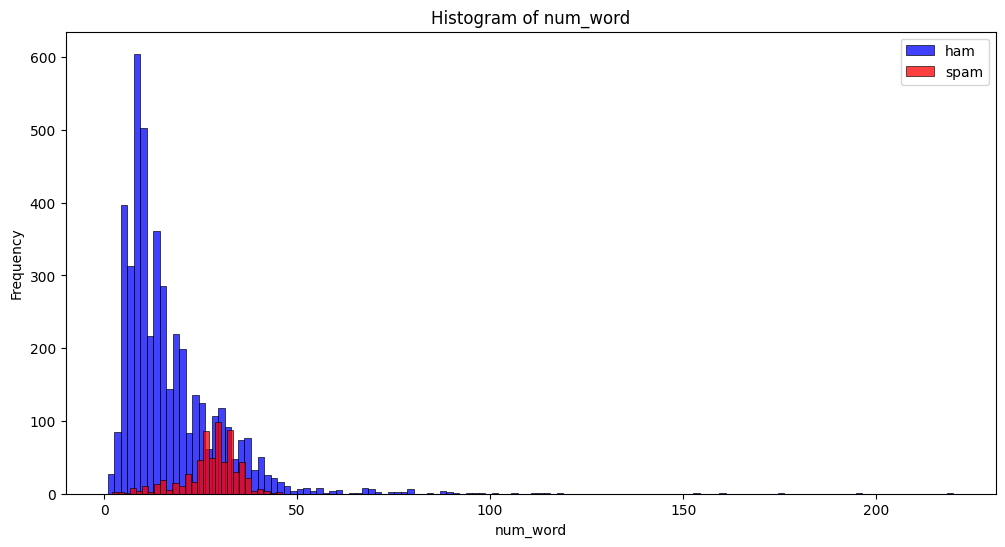

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df[df['Target'] == 0]['num_word'], color='blue', label='ham')
sns.histplot(df[df['Target'] == 1]['num_word'], color='red', label='spam')
plt.legend()
plt.xlabel('num_word')
plt.ylabel('Frequency')
plt.title('Histogram of num_word')
plt.show()

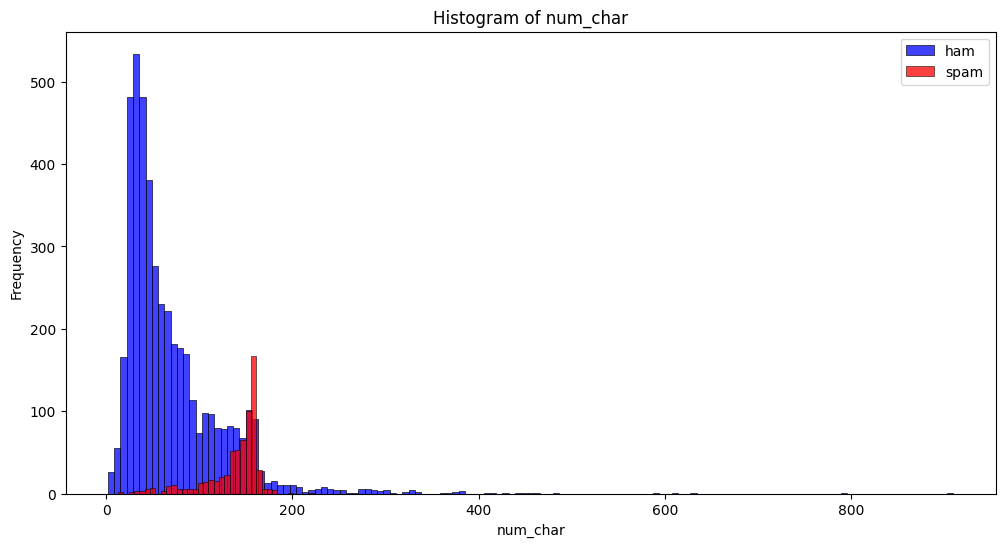

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df[df['Target'] == 0]['num_char'], color='blue', label='ham')
sns.histplot(df[df['Target'] == 1]['num_char'], color='red', label='spam')
plt.legend()
plt.xlabel('num_char')
plt.ylabel('Frequency')
plt.title('Histogram of num_char')
plt.show()

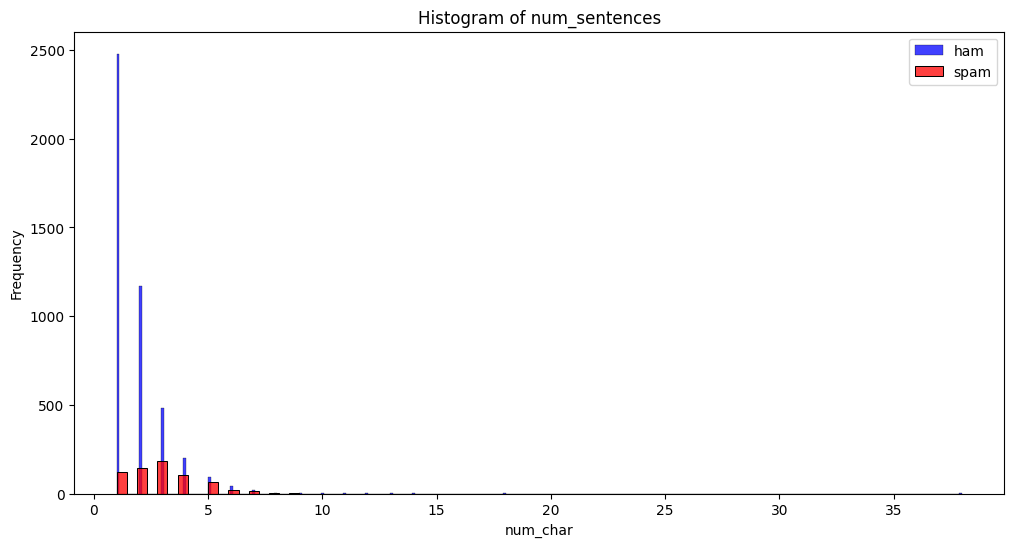

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df[df['Target'] == 0]['num_sentences'], color='blue', label='ham')
sns.histplot(df[df['Target'] == 1]['num_sentences'], color='red', label='spam')
plt.legend()
plt.xlabel('num_char')
plt.ylabel('Frequency')
plt.title('Histogram of num_sentences')
plt.show()

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


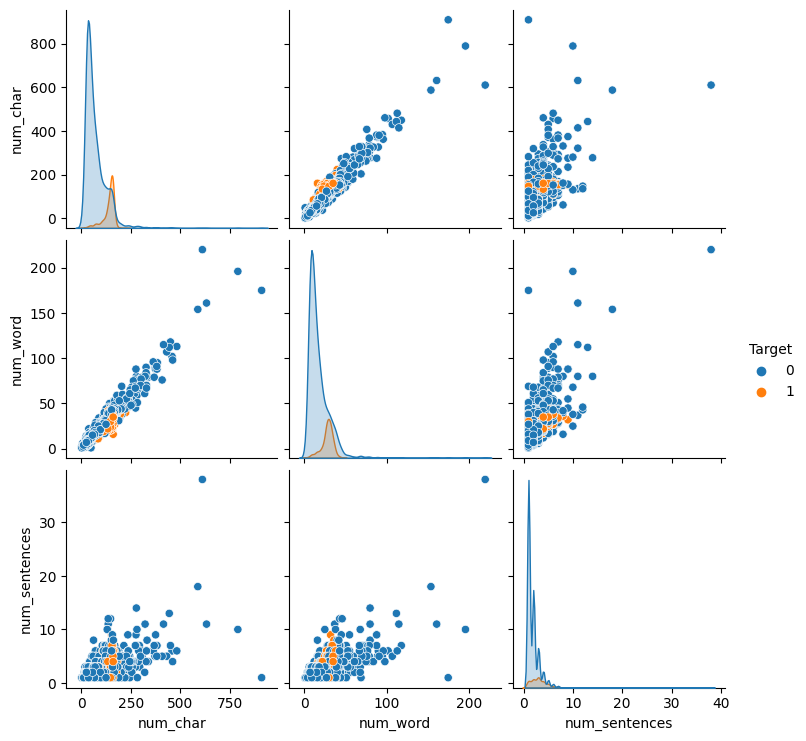

In [34]:
sns.pairplot(df,hue='Target')

<Axes: >

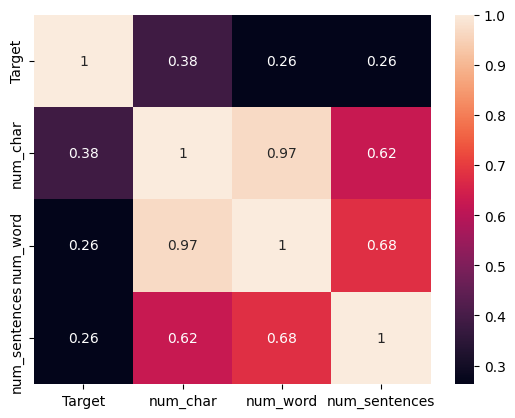

In [35]:
sns.heatmap(df[['Target','num_char','num_word','num_sentences']].corr(),
annot=True)
# so num_char and num_word and num_sentences have multicollinearity
# we should select single column
# we will select num_char

# **Text Preprocessing**

{1} Lower Case

{2} Tokenization

{3}Removing Special Characters

{4} Stop Words Removal and punctuations

{5} Stemming


In [36]:
df.sample(2)

,Target,Text,num_char,num_word,num_sentences
5102,1,This msg is for your mobile content order It h...,153,25,1
1248,0,HI HUN! IM NOT COMIN 2NITE-TELL EVERY1 IM SORR...,152,33,2


In [37]:
from nltk.corpus import stopwords
from textblob import TextBlob
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:] #cloning
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))           
    return " ".join(y)

In [38]:
df['transformed'] = df['Text'].apply(transform_text)

In [39]:
# from textblob import TextBlob
# def text_blob(text):
#     text0 = TextBlob(text)
#     text1 = text0.correct()
#     return (text1)

In [40]:
# df['transformed'] = df['Text'].apply(text_blob)

In [41]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [42]:
df['transformed'] = df['transformed'].astype(str)
spam_wc = wc.generate(df[df['Target'] == 1]['transformed'].str.cat(sep=" "))

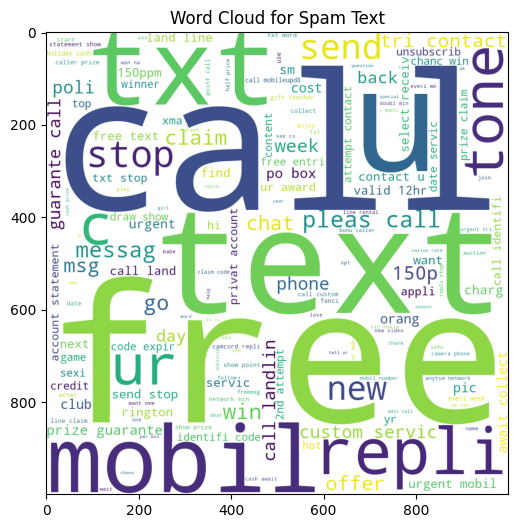

In [43]:
plt.figure(figsize=(25,6))
plt.imshow(spam_wc)
plt.title("Word Cloud for Spam Text")
plt.show()

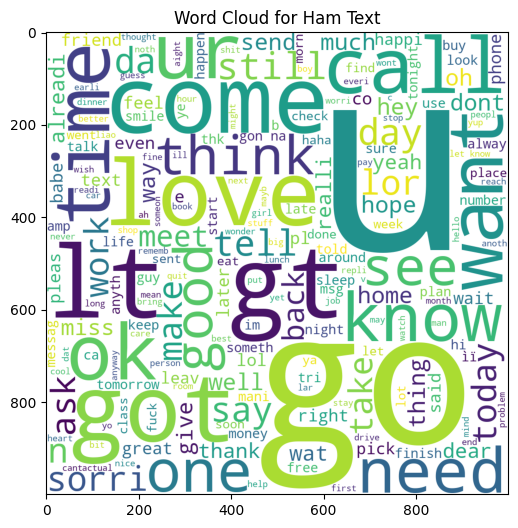

In [44]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed'].str.cat(sep=" "))
plt.figure(figsize=(25,6))
plt.imshow(ham_wc)
plt.title("Word Cloud for Ham Text")
plt.show()

In [45]:
df.head()

,Target,Text,num_char,num_word,num_sentences,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
spam_corpus = []
for msg in df[df['Target']==1]['transformed'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [47]:
len(spam_corpus)

9939

In [48]:
from collections import Counter
Counter(spam_corpus)
# create dictionary that a word occured how much times

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [49]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


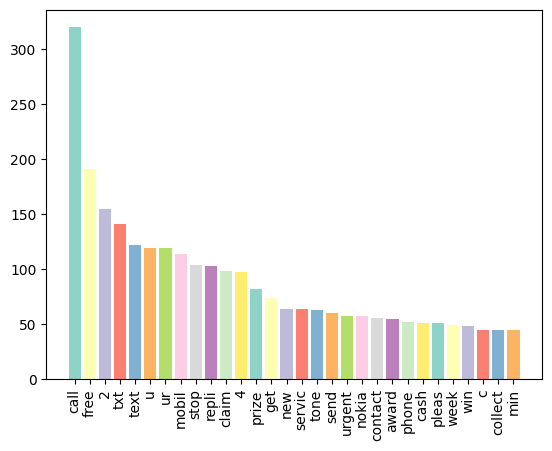

In [50]:
from collections import Counter
palette = sns.color_palette("Set3")
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
pd.DataFrame(Counter(spam_corpus).most_common(30))[1],color=palette)
plt.xticks(rotation='vertical')
plt.show()

In [51]:
# Ham 
ham_corpus = []
for msg in df[df['Target']==0]['transformed'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

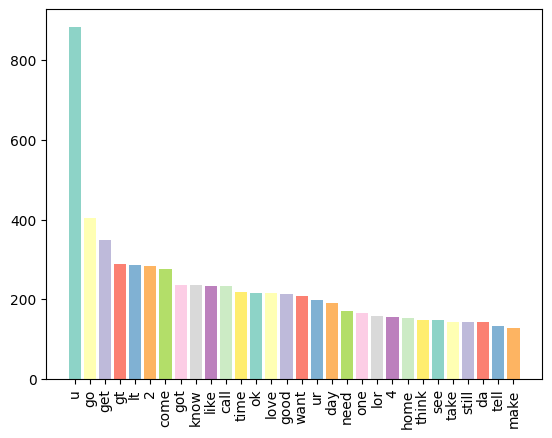

In [52]:
from collections import Counter
palette = sns.color_palette("Set3")
plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
pd.DataFrame(Counter(ham_corpus).most_common(30))[1],color=palette)
plt.xticks(rotation='vertical')
plt.show()

# **Model Building**

In [53]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features=3000)

In [54]:
x = cv.fit_transform(df['transformed']).toarray()

In [55]:
x.shape

(5169, 6708)

In [56]:
y = df['Target']

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,precision_score

gnb = GaussianNB()
mlb = MultinomialNB()
ber = BernoulliNB()

In [59]:
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print('accuracy score',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))

accuracy score 0.8684719535783365
[[788 123]
 [ 13 110]]
precision_score 0.4721030042918455


In [60]:
mlb.fit(x_train,y_train)
y_pred = mlb.predict(x_test)
print('accuracy score',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))

accuracy score 0.9738878143133463
[[895  16]
 [ 11 112]]
precision_score 0.875


In [72]:
ber.fit(x_train,y_train)
y_pred = ber.predict(x_test)
print('accuracy score',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

accuracy score 0.9835589941972921
[[897   4]
 [ 13 120]]
precision_score 0.967741935483871

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       901
           1       0.97      0.90      0.93       133

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034



tfidf

In [62]:
x = tf.fit_transform(df['transformed']).toarray()
y = df['Target']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [63]:
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print('accuracy score',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))

accuracy score 0.8646034816247582
[[778 123]
 [ 17 116]]
precision_score 0.48535564853556484


In [64]:
mlb.fit(x_train,y_train)
y_pred = mlb.predict(x_test)
print('accuracy score',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))
# BEST

accuracy score 0.9758220502901354
[[900   1]
 [ 24 109]]
precision_score 0.990909090909091

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       901
           1       0.99      0.82      0.90       133

    accuracy                           0.98      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.98      0.98      0.97      1034



In [65]:
ber.fit(x_train,y_train)
y_pred = ber.predict(x_test)
print('accuracy score',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

accuracy score 0.9835589941972921
[[897   4]
 [ 13 120]]
precision_score 0.967741935483871

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       901
           1       0.97      0.90      0.93       133

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,VotingClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [67]:
svc = SVC(kernel='sigmoid',gamma=0.1)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
# vc = VotingClassifier([('lr',LogisticRegression(),'svc',SVC(kernel='rbf'))])
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=5,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier()

In [68]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [69]:
def train(classifier,X_train,X_test,Y_train,Y_test):
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    precision = precision_score(Y_test,y_pred)

    return  accuracy, precision

In [70]:
train(svc,X_train=x_train,Y_train=y_train,X_test=x_test,Y_test=y_test)

(0.9284332688588007, 1.0)

In [73]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train(clf, x_train,x_test,y_train,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9284332688588007
Precision -  1.0
For  KN
Accuracy -  0.9129593810444874
Precision -  1.0
For  NB
Accuracy -  0.9758220502901354
Precision -  0.990909090909091
For  DT
Accuracy -  0.9381044487427466
Precision -  0.8165137614678899
For  LR
Accuracy -  0.9555125725338491
Precision -  0.978021978021978
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9622823984526112
Precision -  0.9196428571428571
For  BgC
Accuracy -  0.9642166344294004
Precision -  0.8934426229508197
For  ETC
Accuracy -  0.9738878143133463
Precision -  0.9818181818181818
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9565217391304348
For  xgb
Accuracy -  0.9777562862669246
Precision -  0.9824561403508771


In [74]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),
'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [75]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.928433,1.000000
1,KN,0.912959,1.000000
5,RF,0.971954,1.000000
2,NB,0.975822,0.990909
10,xgb,0.977756,0.982456
8,ETC,0.973888,0.981818
4,LR,0.955513,0.978022
9,GBDT,0.952611,0.956522
6,AdaBoost,0.962282,0.919643
7,BgC,0.964217,0.893443


In [76]:
import pandas as pd
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [77]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.928433
1,KN,Accuracy,0.912959
2,RF,Accuracy,0.971954
3,NB,Accuracy,0.975822
4,xgb,Accuracy,0.977756
5,ETC,Accuracy,0.973888
6,LR,Accuracy,0.955513
7,GBDT,Accuracy,0.952611
8,AdaBoost,Accuracy,0.962282
9,BgC,Accuracy,0.964217


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


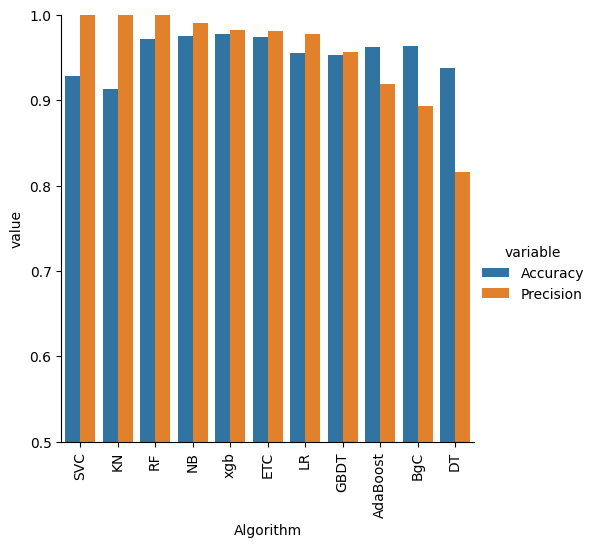

In [78]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# **Pipeline**

In [80]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline  import Pipeline
trf = FunctionTransformer(func=transform_text)
tf = TfidfVectorizer(max_features=3000)



df['transformed'] = df['Text'].apply(transform_text)

x = df['transformed']
y = df['Target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

pipe_tr = Pipeline([('tf',tf),('mnb', MultinomialNB())])
pipe_tr.fit(x_train,y_train)

Pipeline(steps=[('tf', TfidfVectorizer(max_features=3000)),
                ('mnb', MultinomialNB())])

In [81]:
a = 'Even my brother is not like to speak with me. They treat me like aids patent.'
a = transform_text(a)
pred = pipe_tr.predict([a])[0]
if pred == 0:
    print(enc.classes_[0],'0')
else:
    print(enc.classes[1],'1')

ham 0


In [82]:
import pickle 
with open('model.pkl','wb') as s:
    pickle.dump(pipe_tr,s)
